<!DOCTYPE html>
<html>
<body>

<h1 style="text-align: center; font-family: Times New Roman; margin-bottom: 0;">M<span style="font-size: x-large;">AGNETIC</span> M<span style="font-size: x-large;">ETHODS</span> L<span style="font-size: x-large;">AB</span> (GPC522)</h1>

<h2 style="text-align: center; font-family: Times New Roman; margin-top: 0;"><sup style="font-size: larger;">PRACTICAL - V</sup> </h2>

<h3 style="text-align: center; font-family: Times New Roman; margin-top: 0;"><sup style="font-size: larger; font-weight: bold;">Magnetic Data Processing II</sup> </h3>

<h4 style="text-align: center; font-family: 'Courier New'; margin-bottom: 0;">February 12, 2024</h4>
<h4 style="text-align: center; font-family: 'Courier New'; margin-bottom: 0;">Name: Riya Singh Rathore</h4>
<h4 style="text-align: center; font-family: 'Courier New';">Admission Number: 20JE0801</h4>
<h4 style="text-align: center; font-family: 'Times New Roman';">Visit: <a href="https://github.com/RiyaSinghRathore/Magnetic-Methods";">https://github.com/RiyaSinghRathore/Magnetic-Methods</a> for the Lab Repository</h4>

</body>
</html>


In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyIGRF as igrf

In [2]:
# Read Base Magnetometer Readings data
path1 = "Data/BASE-MAGNETIC-READINGS-13FEB2023.txt"
df1 = pd.read_csv(path1, sep='\t', parse_dates={'TIME': ['TIME-H', 'TIME-M', 'TIME-S']})
df1['TIME'] = pd.to_datetime(df1['TIME'], format='%H %M %S')
df1

/var/folders/f0/k3cxr5sj5gb40qhbcd5dzq6m0000gn/T/ipykernel_80901/251325063.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df1 = pd.read_csv(path1, sep='\t', parse_dates={'TIME': ['TIME-H', 'TIME-M', 'TIME-S']})
/var/folders/f0/k3cxr5sj5gb40qhbcd5dzq6m0000gn/T/ipykernel_80901/251325063.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv(path1, sep='\t', parse_dates={'TIME': ['TIME-H', 'TIME-M', 'TIME-S']})


,TIME,BASE-MAG-READINGS
0,1900-01-01 08:30:02,46653.128
1,1900-01-01 08:31:02,46652.628
2,1900-01-01 08:32:02,46652.028
3,1900-01-01 08:33:02,46652.028
4,1900-01-01 08:34:02,46651.628
...,...,...
446,1900-01-01 15:56:02,46634.628
447,1900-01-01 15:57:02,46634.828
448,1900-01-01 15:58:02,46634.928
449,1900-01-01 15:59:02,46635.428


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TIME               451 non-null    datetime64[ns]
 1   BASE-MAG-READINGS  451 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.2 KB


In [4]:
path2 = "Data/RAW-MAG-DATA-DIST-13FEB2023-100M-100M-TIME-15-30.txt"
df2 = pd.read_csv(path2, sep='\t')
df2['TIME'] = pd.to_datetime(df2['TIME AM/PM'], format='%I:%M %p')
df2.drop(columns=['TIME AM/PM'], inplace=True)
df2


,X(m),Y(m),RAW-MAG,IGRF,TIME
0,0,0,46621.14,46381.2,1900-01-01 08:44:00
1,100,0,46595.78,46388.8,1900-01-01 08:48:00
2,200,0,46642.70,46396.4,1900-01-01 08:52:00
3,300,0,46687.13,46404.0,1900-01-01 08:56:00
4,400,0,46703.25,46411.5,1900-01-01 09:00:00
...,...,...,...,...,...
95,500,900,47083.70,46881.6,1900-01-01 15:32:00
96,600,900,47023.86,46889.2,1900-01-01 15:36:00
97,700,900,47085.55,46896.8,1900-01-01 15:40:00
98,800,900,47100.99,46904.3,1900-01-01 15:44:00


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   X(m)     100 non-null    int64         
 1   Y(m)     100 non-null    int64         
 2   RAW-MAG  100 non-null    float64       
 3   IGRF     100 non-null    float64       
 4   TIME     100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 4.0 KB


### a) Plot the raw magnetic data.

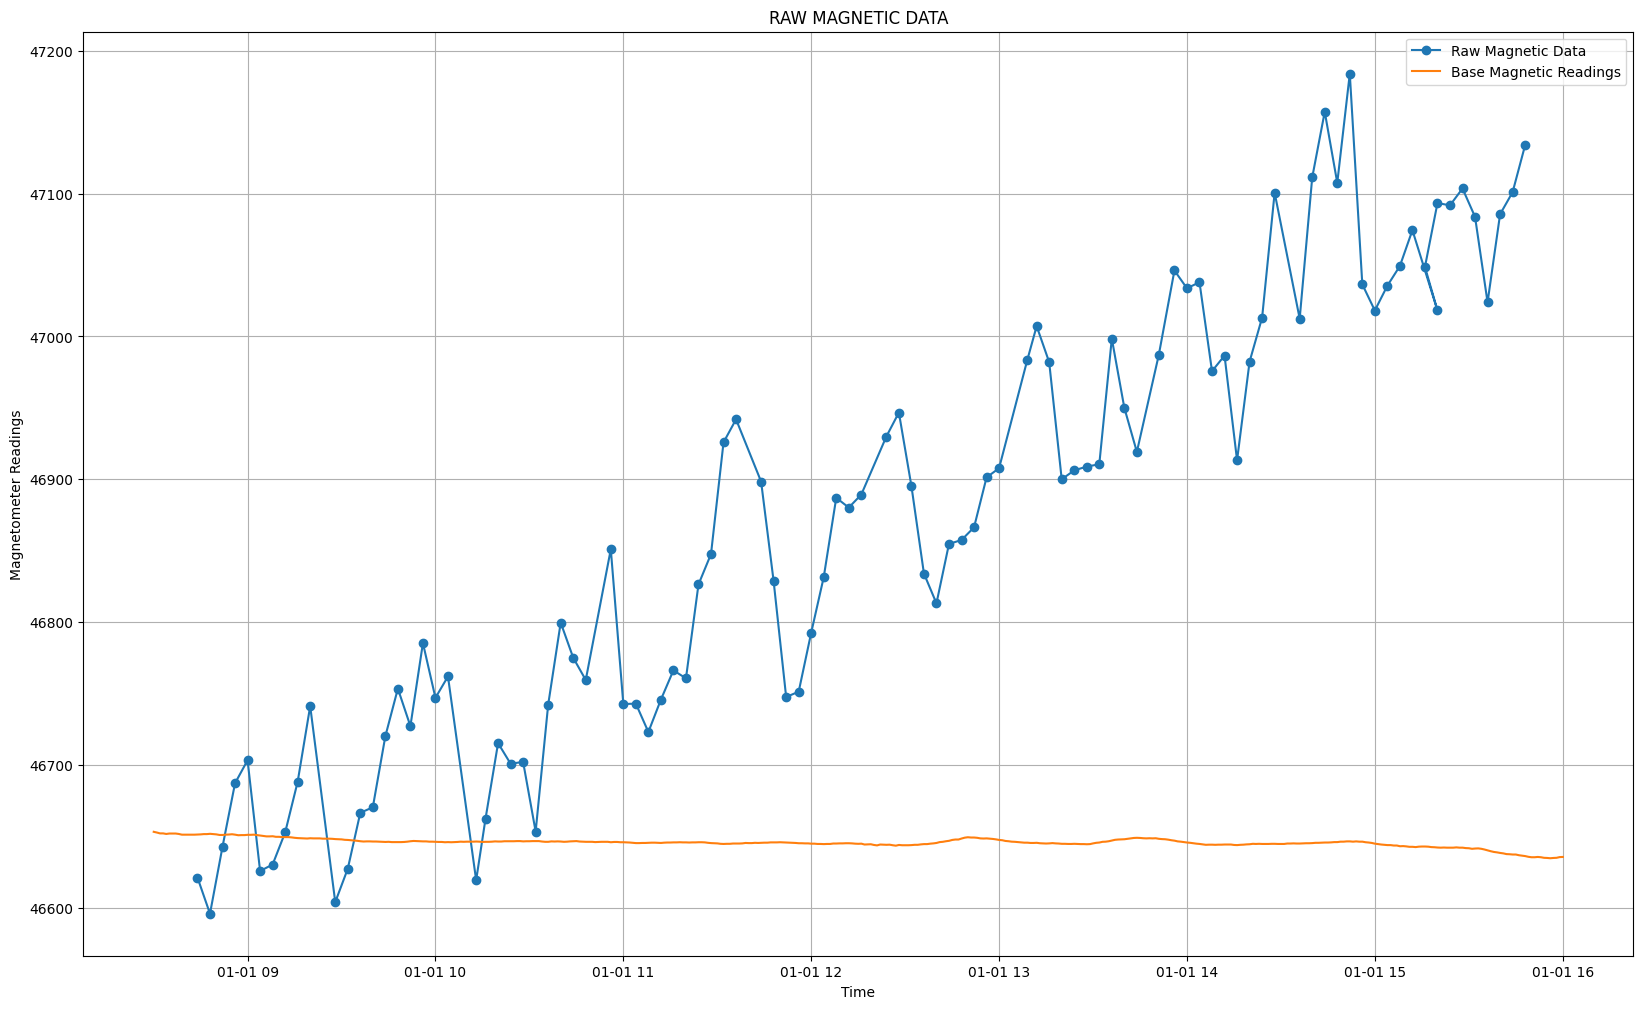

In [6]:
plt.figure(figsize=(20, 12)) 
plt.plot(df2['TIME'], df2['RAW-MAG'], marker='o', label='Raw Magnetic Data')
plt.plot(df1['TIME'], df1['BASE-MAG-READINGS'], label='Base Magnetic Readings')
plt.xlabel('Time')
plt.ylabel('Magnetometer Readings')
plt.title("RAW MAGNETIC DATA")
plt.legend()
plt.grid()

### b) Process the raw magnetic data by applying necessary corrections (Diurnal and IGRF corrections).

### Diurnal Rate Formula
The diurnal rate, representing the change in magnetic field intensity over time, can be calculated using the following formula:

Diurnal Rate = (Base reading at the end of the survey - Base reading at the starting of the survey) / (Time difference between starting and end of the survey (in minute))

### Diurnal Correction Formula
The diurnal correction for magnetic field readings can be calculated using the following formula:

Diurnal correction = Diurnal rate × Time



In [7]:
Diurnal_Rate = df1["BASE-MAG-READINGS"].iloc[0] - df1["BASE-MAG-READINGS"].iloc[-1]

for i in range(len(df1) - 1):
    df1["DIURNAL_CORRECTION"] = Diurnal_Rate * (df1["TIME"].iloc[i+1] - df1["TIME"].iloc[i])
    
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   TIME                451 non-null    datetime64[ns] 
 1   BASE-MAG-READINGS   451 non-null    float64        
 2   DIURNAL_CORRECTION  451 non-null    timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), timedelta64[ns](1)
memory usage: 10.7 KB


In [8]:
# Convert DIURNAL_CORRECTION from timedelta to seconds, then to integer
df1["DIURNAL_CORRECTION"] = df1["DIURNAL_CORRECTION"].dt.total_seconds().astype(int)
df1

,TIME,BASE-MAG-READINGS,DIURNAL_CORRECTION
0,1900-01-01 08:30:02,46653.128,1055
1,1900-01-01 08:31:02,46652.628,1055
2,1900-01-01 08:32:02,46652.028,1055
3,1900-01-01 08:33:02,46652.028,1055
4,1900-01-01 08:34:02,46651.628,1055
...,...,...,...
446,1900-01-01 15:56:02,46634.628,1055
447,1900-01-01 15:57:02,46634.828,1055
448,1900-01-01 15:58:02,46634.928,1055
449,1900-01-01 15:59:02,46635.428,1055


In [11]:
df1.sort_values(by='TIME', inplace=True)
df2.sort_values(by='TIME', inplace=True)
data = pd.merge_asof(df1, df2, on='TIME', direction='nearest')

data['DIURNAL_CORRECTED'] = data['RAW-MAG'] - data["DIURNAL_CORRECTION"]
data

,TIME,BASE-MAG-READINGS,DIURNAL_CORRECTION,X(m),Y(m),RAW-MAG,IGRF,DIURNAL_CORRECTED
0,1900-01-01 08:30:02,46653.128,1055,0,0,46621.14,46381.2,45566.14
1,1900-01-01 08:31:02,46652.628,1055,0,0,46621.14,46381.2,45566.14
2,1900-01-01 08:32:02,46652.028,1055,0,0,46621.14,46381.2,45566.14
3,1900-01-01 08:33:02,46652.028,1055,0,0,46621.14,46381.2,45566.14
4,1900-01-01 08:34:02,46651.628,1055,0,0,46621.14,46381.2,45566.14
...,...,...,...,...,...,...,...,...
446,1900-01-01 15:56:02,46634.628,1055,900,900,47133.94,46911.8,46078.94
447,1900-01-01 15:57:02,46634.828,1055,900,900,47133.94,46911.8,46078.94
448,1900-01-01 15:58:02,46634.928,1055,900,900,47133.94,46911.8,46078.94
449,1900-01-01 15:59:02,46635.428,1055,900,900,47133.94,46911.8,46078.94


### c) Plot the Diurnal curve for the entire period of the survey.

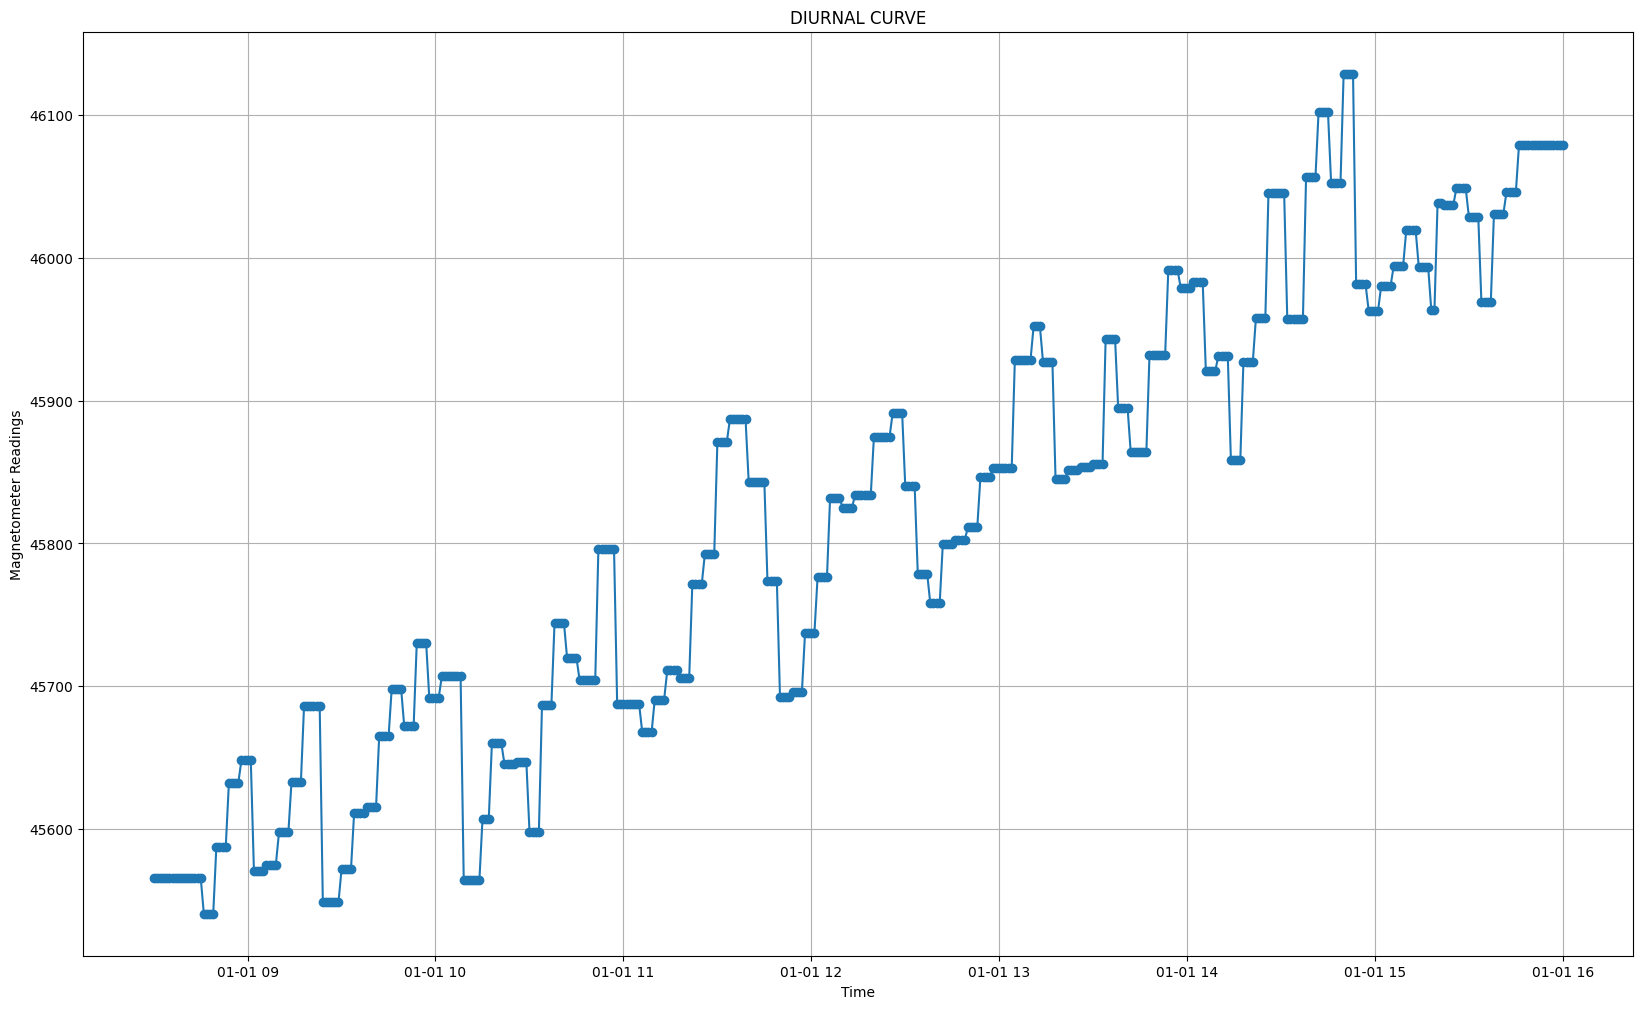

In [12]:
plt.figure(figsize=(20, 12)) 
plt.plot(data['TIME'], data['DIURNAL_CORRECTED'], marker='o')
plt.xlabel('Time')
plt.ylabel('Magnetometer Readings')
plt.title("DIURNAL CURVE")
plt.grid()

IGRF Correction: The International Geomagnetic Reference Field (IGRF) is a standard
mathematical description of the large-scale structure of the Earth's main magnetic field and its
secular variation. Subtracting the IGRF field from the Earth's field will in principle result in anomalies caused
by sources within the Earth's crust where the temperatures are less than the Curie temperatures of
important magnetic minerals.

In [13]:
data['PROCESSED'] = data['DIURNAL_CORRECTED'] - data["IGRF"]
data

,TIME,BASE-MAG-READINGS,DIURNAL_CORRECTION,X(m),Y(m),RAW-MAG,IGRF,DIURNAL_CORRECTED,PROCESSED
0,1900-01-01 08:30:02,46653.128,1055,0,0,46621.14,46381.2,45566.14,-815.06
1,1900-01-01 08:31:02,46652.628,1055,0,0,46621.14,46381.2,45566.14,-815.06
2,1900-01-01 08:32:02,46652.028,1055,0,0,46621.14,46381.2,45566.14,-815.06
3,1900-01-01 08:33:02,46652.028,1055,0,0,46621.14,46381.2,45566.14,-815.06
4,1900-01-01 08:34:02,46651.628,1055,0,0,46621.14,46381.2,45566.14,-815.06
...,...,...,...,...,...,...,...,...,...
446,1900-01-01 15:56:02,46634.628,1055,900,900,47133.94,46911.8,46078.94,-832.86
447,1900-01-01 15:57:02,46634.828,1055,900,900,47133.94,46911.8,46078.94,-832.86
448,1900-01-01 15:58:02,46634.928,1055,900,900,47133.94,46911.8,46078.94,-832.86
449,1900-01-01 15:59:02,46635.428,1055,900,900,47133.94,46911.8,46078.94,-832.86


### d) Plot the processed magnetic data.

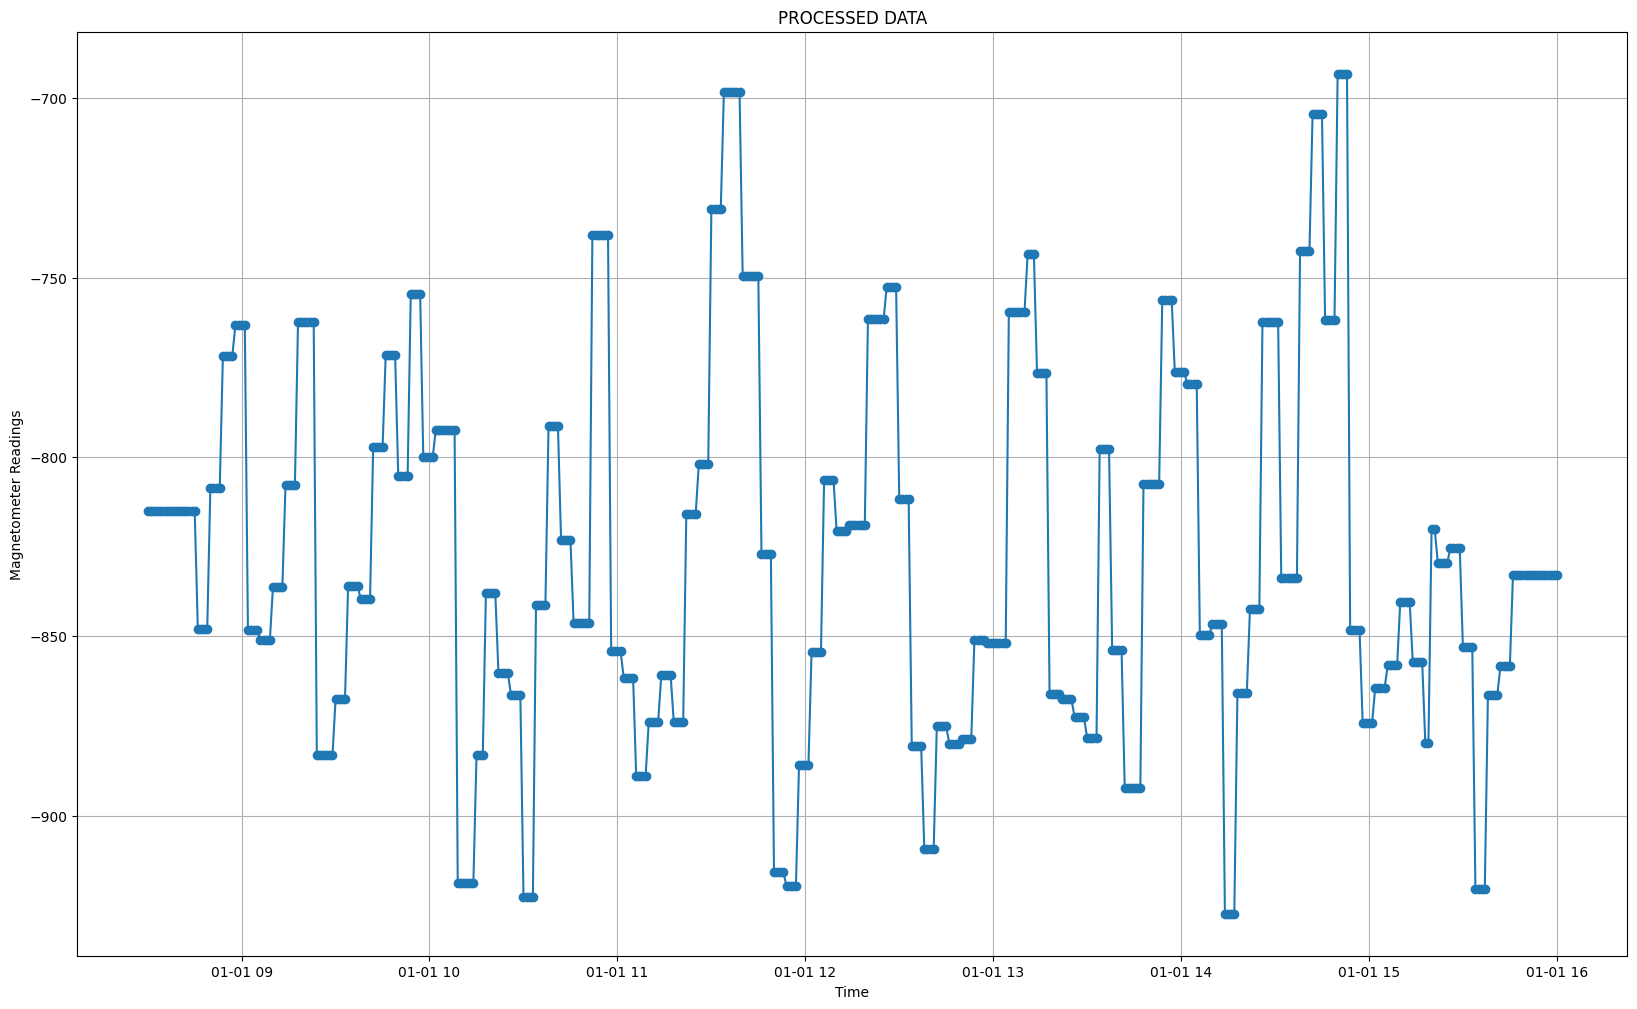

In [14]:
plt.figure(figsize=(20, 12)) 
plt.plot(data['TIME'], data['PROCESSED'], marker='o')
plt.xlabel('Time')
plt.ylabel('Magnetometer Readings')
plt.title("PROCESSED DATA")
plt.grid()